# Project Banana Navigation

---

Follow the instructions below to train an agent for the project.


### 1. Start the Environment

Run the next code cell to import necessary packages and load the environment.

In [1]:
import platform
from collections import deque
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from unityagents import UnityEnvironment
from agent import Agent
from params import VarParam, DQNParameters

# please do not modify the line below
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(f'brain_name : {brain_name}')
print(f'brain      : {brain}')

brain_name : BananaBrain
brain      : Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 4. Define agent

In the code section below we make use of DQNParameters helper class to define and modify DQN training paramters. This class provides an easy way to manage the various paramters. It has predefined values that we will use as is, but you may certainly modify them to see how they affect the performance of the training.

The Agent class defines an agent which in turn makes use of Dueling Double DQN. It also makes use of a prioritized replay buffer.

In [4]:
params = DQNParameters(state_size=state_size, action_size=action_size)
agent = Agent(params)

print(params)

lr=0.0005, epsilon=1.000, gamma=0.900, beta=0.400, tau=0.001


### 5. Let us train an agent using DQN in the Banana Environment

The code cell below will train the agent.


In [6]:
def dqn_train(agent, env, params, n_episodes=2000, max_t=100000):
    brain_name = env.brain_names[0]
    passing_score_achieved = False  # Achieved when average score for 100 episodes reaches 13
    scores = []  # List of scores for an episode
    scores_window = deque(maxlen=100)  # Most recent 100 scores

    for i_episode in range(1, n_episodes + 1):
        # Reset environment
        env_info = env.reset(train_mode=True)[brain_name]

        # Get next state
        state = env_info.vector_observations[0]

        score = 0
        for t in range(max_t):

            action = agent.act(state, params.epsilon()) # Get recommended action from agent for current state

            env_info = env.step(action)[brain_name] # Send action to environment

            next_state = env_info.vector_observations[0] # Get the next state from the environment

            reward = env_info.rewards[0] # Get reward for having taken the action

            done = env_info.local_done[0] # Check if the episode is finished

            # run agent step - which adds to the experience and also learns
            agent.step(state, action, reward, next_state, done)

            score += reward
            state = next_state

            # Exit if episode finished
            if done:
                break

        scores_window.append(score)
        scores.append(score)

        # update parameters used by the agent.
        params.epsilon.decrement()  # reduce randomness for action selection
        params.gamma.increment()    # give more priority to future returns
        params.tau.increment()      # make larger updates to target DQN
        params.beta.increment()     # increase bias for weights from stored experiences

        print('\rEpisode {}\tAverage Score: {:.4f}\t{}'.format(i_episode, np.mean(scores_window), params), end="")

        if i_episode % scores_window.maxlen == 0:
            print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window) > 13 and not passing_score_achieved:
            passing_score_achieved = True
            print('\rPassing score achieved in {:d} episodes!\tAverage Score: {:.4f}'.format(i_episode,
                                                                                             np.mean(scores_window)))
    if passing_score_achieved:
        torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
        print("\r\nTrained DQN parameters saved in 'checkpoint.pth'.")
    else:
        print("\r\nPassing score not achieved :(")

    return scores

# Make a call to test the function
# It will quickly loop through the function couple of times
scores = dqn_train(agent, env, params, n_episodes=2, max_t=100)

Episode 2	Average Score: 0.0000	lr=0.0005, epsilon=0.980, gamma=0.904, beta=0.412, tau=0.001
Passing score not achieved :(


Call the function define above in ernerst to start training and save a DQN. This will take some time.

Episode 100	Average Score: 0.7900	lr=0.0005, epsilon=0.598, gamma=0.958, beta=0.644, tau=0.001
Episode 200	Average Score: 3.7500	lr=0.0005, epsilon=0.366, gamma=0.978, beta=0.784, tau=0.001
Episode 300	Average Score: 7.5600	lr=0.0005, epsilon=0.226, gamma=0.986, beta=0.869, tau=0.001
Episode 400	Average Score: 10.4500	lr=0.0005, epsilon=0.141, gamma=0.988, beta=0.921, tau=0.001
Episode 500	Average Score: 11.1000	lr=0.0005, epsilon=0.089, gamma=0.989, beta=0.952, tau=0.001
Episode 600	Average Score: 12.4400	lr=0.0005, epsilon=0.058, gamma=0.990, beta=0.971, tau=0.002
Passing score achieved in 653 episodes!	Average Score: 13.0100amma=0.990, beta=0.978, tau=0.002
Episode 700	Average Score: 13.3400	lr=0.0005, epsilon=0.039, gamma=0.990, beta=0.982, tau=0.002
Episode 800	Average Score: 14.5800	lr=0.0005, epsilon=0.028, gamma=0.990, beta=0.989, tau=0.002
Episode 900	Average Score: 14.3100	lr=0.0005, epsilon=0.021, gamma=0.990, beta=0.994, tau=0.002
Episode 1000	Average Score: 14.8600	lr=0.00

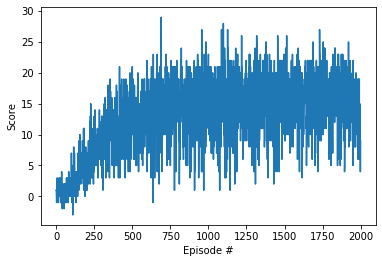

In [7]:
scores = dqn_train(agent, env, params, n_episodes=2000, max_t=100000)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 6. Let us see how a trained agent performs.

Let us see how a trained agent scores.

In [11]:
def load_and_run_agent(agent, env, n_episodes):
    """
    agent: the learning agent
    checkpoint: the saved weights for the pretrained neural network
    n_episodes: the number of episodes to run
    """

    # load the weights from file
    agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
    brain_name = env.brain_names[0]

    total_score = 0

    for i in range(1, n_episodes+1):

        # Reset the environment. Training mode is off.
        env_info = env.reset(train_mode=True)[brain_name]

        # Get the current state
        state = env_info.vector_observations[0]

        score = 0

        print(f'Episode[{i}]', end='')
        
        while True:
            # Decide on an action given the current state
            action = agent.act(state)

            # Send action to the environment
            env_info = env.step(action)[brain_name]

            # Get the next state
            next_state = env_info.vector_observations[0]

            # Get the reward
            reward = env_info.rewards[0]

            # Check if the episode is finished
            done = env_info.local_done[0]

            # Add the current reward into the score
            score += reward
            if reward==1:
                print(f'+', end='')
            elif reward==-1:
                print(f'-', end='')

            state = next_state

            # Exit the loop when the episode is done
            if done:
                break
            
        total_score += score
        
        print(f' = {score}')

    print(f'Average Score: {total_score / n_episodes}')

In [15]:
load_and_run_agent(agent, env, n_episodes=20)

Episode[1]-++-+++++++++++++-+++ = 15.0
Episode[2]++++-++++++++++++++ = 19.0
Episode[3]+++++++++++++++++++++++ = 23.0
Episode[4]+++++++++++++++++ = 17.0
Episode[5]++++++++++++++++++ = 18.0
Episode[6]++++++++++++++++ = 16.0
Episode[7]+++++++++++++++++++ = 19.0
Episode[8]-+++++++++++++ = 12.0
Episode[9]-++++++++++++++++ = 15.0
Episode[10]+++++++++++++++++++ = 19.0
Episode[11]++++++++++++++++++++++ = 22.0
Episode[12]+++++++++++++ = 13.0
Episode[13]+++++++++++ = 11.0
Episode[14]+++++++++++++++++ = 17.0
Episode[15]+++++++++++++++++ = 17.0
Episode[16]++++++++++++++++ = 16.0
Episode[17]++++++++++++++++++++ = 20.0
Episode[18]+++++++++++++++++ = 17.0
Episode[19]++-+++++++++++++++++++ = 20.0
Episode[20]+++++++++++++++ = 15.0
Average Score: 17.05
